In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy.odr.odrpack as odrpack
from IPython.display import clear_output

In [95]:
import random
import numpy as np
import scipy.stats as st

class DifferencingDecisionModel:
    
    def __init__(self):
        pass
        
    def convert_k_to_p(self, d_prime, k1, k2):
        
        p_k1_false = st.norm.cdf(-k1/math.sqrt(2))
        p_k2_false = st.norm.cdf(-k2/math.sqrt(2))
        p_false = (p_k1_false + p_k2_false)
        
        #p_k1_hit = st.norm.cdf((-d_prime - k1)/math.sqrt(2)) + st.norm.cdf((d_prime - k1)/math.sqrt(2))
        #p_k2_hit = st.norm.cdf((-d_prime - k2)/math.sqrt(2)) + st.norm.cdf((d_prime - k2)/math.sqrt(2))
        p_k1_hit = st.norm.cdf((d_prime - k1)/math.sqrt(2))
        p_k2_hit = st.norm.cdf((d_prime - k2)/math.sqrt(2))
        p_hit = (p_k1_hit + p_k2_hit)/2
        
        return p_false, p_hit
        
    def convert_k_to_z(self, d_prime, k1, k2):
        
        p_false, p_hit = self.convert_k_to_p(d_prime, k1, k2)
        return st.norm.ppf(p_false), st.norm.ppf(p_hit)
        
    def sample_k1_k2_values_to_z(self, k_range, d_prime, num_points):
        
        # DF2
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k1 = random.choice(k_range)
            k2 = random.choice(k_range)
            while k2 < -k1:
                k2 = random.choice(k_range)
            
            z_f, z_h = self.convert_k_to_z(d_prime, k1, k2)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k1_k2_values_to_p(self, k_range, d_prime, num_points):
        
        # DF2
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for i in range(num_points):
            k1 = random.choice(k_range)
            k2 = random.choice(k_range)
            while k2 < -k1:
                k2 = random.choice(k_range)
            
            p_f, p_h = self.convert_k_to_p(d_prime, k1, k2)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
    
    def sample_k_values_to_z(self, k_range, d_prime, num_points):
        
        # DF1
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num']) if n >= 0]
        for _ in range(num_points):
            k = random.choice(k_range)
            z_f, z_h = self.convert_k_to_z(d_prime, k, k)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k_values_to_p(self, k_range, d_prime, num_points):
        
        # DF1
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num']) if n >= 0]
        for _ in range(num_points):
            k = random.choice(k_range)
            p_f, p_h = self.convert_k_to_p(d_prime, k, k)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
        
    def get_k_values_to_z(self, k_range, d_prime):
        
        # DF1
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num']) if n >= 0]
        for k in k_range:
            z_f, z_h = self.convert_k_to_z(d_prime, k, k)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def get_k_values_to_p(self, k_range, d_prime):
        
        # DF1
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num']) if n >= 0]
        for k in k_range:
            p_f, p_h = self.convert_k_to_p(d_prime, k, k)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
        
df_model = DifferencingDecisionModel()

# DF2 k-Value Grid Sampling

Text(0.5, 1.0, "DF2 k-Sampling (d'=2.5, -4<k<4)")

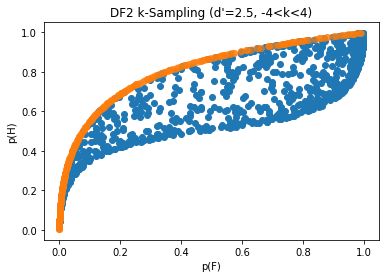

In [22]:
k_range = {'k_min': -4, 'k_max': 6, 'k_num': 1000}
zf_vals, zh_vals = df_model.sample_k1_k2_values_to_p(k_range, 2.5, 1000)
zf_vals_k, zh_vals_k = df_model.sample_k_values_to_p(k_range, 2.5, 1000)

plt.scatter(zf_vals, zh_vals)
plt.scatter(zf_vals_k, zh_vals_k, alpha=0.3)
plt.xlabel('p(F)')
plt.ylabel('p(H)')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.title('DF2 k-Sampling (d\'=2.5, -4<k<4)')

In [11]:
# DF2 k-sampling w/ subject z-value data

k_range = {'k_min': -4, 'k_max': 4, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 26}

data = pd.read_csv('data/z_data.csv', index_col=0)
x_vals = [-4, 3]
explained_subs = ['BYZ','HP','HYP','SL','YPL','YJC','ZJT','QP','TCD','YCX','ZXL','ZY','CW','WJ','RSL','SJ2','LXL','SYB','WY','YJX','CY','GJ','JYN','SJ','SXQ','ZQT']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zf_vals, zh_vals = df_model.sample_k1_k2_values_to_z(k_range, dp, 1000)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zf_vals, zh_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'] in explained_subs:
            alpha = 0.3
            zf_vals = sub_data.filter(like='ZF').tolist()
            zh_vals = sub_data.filter(like='ZH').tolist()
            plt.plot(zf_vals, zh_vals, color='black', alpha=alpha)    
    
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.title(f'DF2 k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>

In [18]:
# DF2 k-sampling w/ subject p-value data

k_range = {'k_min': 0, 'k_max': 4, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 26}

data = pd.read_csv('data/p_data.csv', index_col=0)
x_vals = [-4, 3]
explained_subs = ['BYZ','HP','HYP','SL','YPL','YJC','ZJT','QP','TCD','YCX','ZXL','ZY','CW','WJ','RSL','SJ2','LXL','SYB','WY','YJX','CY','GJ','JYN','SJ','SXQ','ZQT']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    pf_vals, ph_vals = df_model.sample_k1_k2_values_to_p(k_range, dp, 1000)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(pf_vals, ph_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'].replace('\'', "") in explained_subs:
            alpha = 0.3
            pf_vals = sub_data.filter(like='PF').tolist()
            ph_vals = sub_data.filter(like='PH').tolist()
            plt.plot(pf_vals, ph_vals, color='black', alpha=alpha)    
    
    plt.xlabel('p(F)')
    plt.ylabel('p(H)')
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.title(f'DF2 k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>

# DF2 Boundary Characterization
• http://blog.thehumangeo.com/2014/05/12/drawing-boundaries-in-python/ <br>
• https://stackoverflow.com/questions/16750618/whats-an-efficient-way-to-find-if-a-point-lies-in-the-convex-hull-of-a-point-cl <br>
• https://stackoverflow.com/questions/50549128/boundary-enclosing-a-given-set-of-points <br>

In [13]:
from shapely import geometry
from scipy.spatial import Delaunay
import numpy as np

def alpha_shape(points, alpha, only_outer=True):
    """
    Compute the alpha shape (concave hull) of a set of points.
    :param points: np.array of shape (n,2) points.
    :param alpha: alpha value.
    :param only_outer: boolean value to specify if we keep only the outer border
    or also inner edges.
    :return: set of (i,j) pairs representing edges of the alpha-shape. (i,j) are
    the indices in the points array.
    """
    assert points.shape[0] > 3, "Need at least four points"

    def add_edge(edges, i, j):
        """
        Add an edge between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
            # already added
            assert (j, i) in edges, "Can't go twice over same directed edge right?"
            if only_outer:
                # if both neighboring triangles are in shape, it's not a boundary edge
                edges.remove((j, i))
            return
        edges.add((i, j))

    try:
        tri = Delaunay(points)
    except:
        print('Shape too flat!')
        return set()
    edges = set()
    # Loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.vertices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]
        # Computing radius of triangle circumcircle
        # www.mathalino.com/reviewer/derivation-of-formulas/derivation-of-formula-for-radius-of-circumcircle
        a = np.sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
        b = np.sqrt((pb[0] - pc[0]) ** 2 + (pb[1] - pc[1]) ** 2)
        c = np.sqrt((pc[0] - pa[0]) ** 2 + (pc[1] - pa[1]) ** 2)
        s = (a + b + c) / 2.0
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        circum_r = a * b * c / (4.0 * area)
        if circum_r < alpha:
            add_edge(edges, ia, ib)
            add_edge(edges, ib, ic)
            add_edge(edges, ic, ia)
    return edges

def find_edges_with(i, edge_set):
    i_first = [j for (x,j) in edge_set if x==i]
    i_second = [j for (j,x) in edge_set if x==i]
    return i_first,i_second

def stitch_boundaries(edges):
    edge_set = edges.copy()
    boundary_lst = []
    while len(edge_set) > 0:
        boundary = []
        edge0 = edge_set.pop()
        boundary.append(edge0)
        last_edge = edge0
        while len(edge_set) > 0:
            i,j = last_edge
            j_first, j_second = find_edges_with(j, edge_set)
            if j_first:
                edge_set.remove((j, j_first[0]))
                edge_with_j = (j, j_first[0])
                boundary.append(edge_with_j)
                last_edge = edge_with_j
            elif j_second:
                edge_set.remove((j_second[0], j))
                edge_with_j = (j, j_second[0])  # flip edge rep
                boundary.append(edge_with_j)
                last_edge = edge_with_j

            if edge0[0] == last_edge[1]:
                break

        boundary_lst.append(boundary)
    return boundary_lst

In [46]:
k_range = {'k_min': -4, 'k_max': 6, 'k_num': 1001}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 101}

df1_model_data = dict()

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zfm_vals, zhm_vals = df_model.get_k_values_to_z(k_range, dp)
    zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if np.isfinite(zfm_vals)[i] and np.isfinite(zhm_vals)[i]]
    zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if np.isfinite(zfm_vals)[i] and np.isfinite(zhm_vals)[i]]
    zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new
                      
    df1_model_data[dp] = [zfm_vals, zhm_vals]
    
df1_p_model_data = {key: [[st.norm.cdf(z) for z in df1_model_data[key][0]], [st.norm.cdf(z) for z in df1_model_data[key][1]]] for key in df1_model_data}


In [47]:
k_range = {'k_min': -4, 'k_max': 6, 'k_num': 1001}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 101}
num_of_pts = 2000

df2_model_data = dict()

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zfm_vals, zhm_vals = df_model.sample_k1_k2_values_to_z(k_range, dp, num_of_pts)
    zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if np.isfinite(zfm_vals)[i] and np.isfinite(zhm_vals)[i]]
    zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if np.isfinite(zfm_vals)[i] and np.isfinite(zhm_vals)[i]]
    zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new
                      
    df2_model_data[dp] = [zfm_vals, zhm_vals]
    
df2_p_model_data = {key: [[st.norm.cdf(z) for z in df2_model_data[key][0]], [st.norm.cdf(z) for z in df2_model_data[key][1]]] for key in df2_model_data}


In [56]:
%%capture --no-stdout

z_data = pd.read_csv('data/z_data.csv', index_col=1)
explained_subs = ['CW','CY','GJ','JYN','LXL','RSL','SJ2','SJ','SXQ','SYB','WJ','WY','YJX','ZQT','BYZ','HP','HYP','QP','SL','TCD','YCX','YJC','YPL','ZJT','ZXL','ZY']
explained_subs.sort()

alpha_value = 0.25

count = 1
is_first = True
fig = plt.figure(figsize=(42, 24))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
rows, cols = 5, 6

df = pd.DataFrame(columns=['Subject', 'DF2 d\'', 'DF2 Contained Pts'])

for subject in explained_subs:
    z_sub_data = z_data.loc[subject]
    zf_vals = [n for n in z_sub_data.filter(like='ZF').tolist() if n != 0]
    zh_vals = [n for n in z_sub_data.filter(like='ZH').tolist() if n != 0]
    pf_vals = [st.norm.cdf(z) for z in zf_vals]
    ph_vals = [st.norm.cdf(z) for z in zh_vals]
    
    '''
    Optimal DF2 w/ Corresponding DF1 and Human Data
    '''
    
    best_dp, points_explained, total_out_dist = 0, 0, np.inf
    for dp in df2_p_model_data.keys():
        
        if float(dp) == 0:
            continue
        
        pfm_vals, phm_vals = df2_p_model_data[dp]
        
        # Find boundaries of cloud and calculate number of points within cloud
        points = np.column_stack((pfm_vals, phm_vals))
        edges = alpha_shape(points, alpha=alpha_value, only_outer=True)
        boundaries = stitch_boundaries(edges)[0]
        edge_pts = [points[pt[0]] for pt in boundaries]
        cloud = geometry.Polygon(edge_pts)
        
        num_explained = [cloud.contains(geometry.Point(pf, ph)) for pf, ph in zip(pf_vals, ph_vals)].count(True)
        
        if num_explained > points_explained:
            best_dp = dp
            points_explained = num_explained
            total_out_dist = 0
            
            # Calculate new baseline for outlier distance
            for pf, ph in zip(pf_vals, ph_vals):
                point = geometry.Point(pf, ph)
                if not cloud.contains(point):
                    total_out_dist += cloud.exterior.distance(point)
        elif num_explained == points_explained:
            curr_out_dist = 0
            
            # Check if current outlier distance is less than best
            for pf, ph in zip(pf_vals, ph_vals):
                point = geometry.Point(pf, ph)
                if not cloud.contains(point):
                    curr_out_dist += cloud.exterior.distance(point)
            if curr_out_dist < total_out_dist:
                best_dp = dp
                total_out_dist = curr_out_dist
    
    print(f"{subject}: {points_explained} points explained with d\'={round(float(best_dp), 3)} w/ optimal DF2")
    df.loc[len(df)] = [subject, round(float(best_dp), 3), points_explained]

    subject_acc = f"{'{:.2f}'.format(round(z_sub_data['Accuracy'], 3))}"
    model_acc = f"{'{:.3f}'.format(round((st.norm.cdf(float(best_dp)/2))**2 + (st.norm.cdf(-float(best_dp)/2))**2, 3))}"
    ax = fig.add_subplot(rows, cols, count)
    
    # Plot DF2 model cloud boundary
    pfm_vals, phm_vals = df2_p_model_data[best_dp]
    points = np.column_stack((pfm_vals, phm_vals))
    edges = alpha_shape(points, alpha=alpha_value, only_outer=True)
    for i, j in edges:
        ax.plot(points[[i, j], 0], points[[i, j], 1], alpha=0.3, color='black', zorder=1)
        
    # Plot DF2 model cloud
    ax.scatter(pfm_vals, phm_vals, alpha=0.1, label='DF2', color='black', marker='.')
    
    # Plot DF1 ROC
    pfm_vals, phm_vals = df1_p_model_data[best_dp]
    ax.plot(pfm_vals, phm_vals, label='DF1', color='black')
    
    # Plot human data points
    ax.scatter(pf_vals, ph_vals, label='Human', color='black', marker='s')
    
    # Format plots accordingly
    dp_str = f"{'{:.3f}'.format(round(float(best_dp), 3))}"
    ax.text(0.5, 0.05, f"Subject {subject}\n" + "Model $\it{d\'}$=" + f"{dp_str}", transform=ax.transAxes, ha='center', fontsize=8)
    ax.text(0.63, 0.3, "$\it{P}$$_c$: " + f"{subject_acc} (human),\n     {model_acc} (optimal model)", transform=ax.transAxes, ha='left', fontsize=8)
    
    if is_first:
        ax.text(0.03, 0.87, 'Best-fit DF2, Corresponding DF1, \nand Human Data', transform=ax.transAxes, ha='left')
        ax.set_xlabel('p(F)')
        ax.set_ylabel('p(H)')
        ax.legend(loc=4, prop={'size': 8})
        is_first = False
    else:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
    #extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    #fig.savefig(f'results/output/DF2_boundary_{subject}.svg', bbox_inches=extent)
    count += 1
    
    fig.savefig('results/DF2_boundary.pdf')
    fig.savefig('results/DF2_boundary.svg')

df.to_csv('results/df2.csv')

BYZ: 2 points explained with d'=0.475 w/ optimal DF2
CW: 3 points explained with d'=2.4 w/ optimal DF2
CY: 1 points explained with d'=2.45 w/ optimal DF2
GJ: 1 points explained with d'=2.425 w/ optimal DF2
HP: 1 points explained with d'=0.575 w/ optimal DF2
HYP: 3 points explained with d'=1.575 w/ optimal DF2
JYN: 1 points explained with d'=1.85 w/ optimal DF2
LXL: 0 points explained with d'=2.5 w/ optimal DF2
QP: 2 points explained with d'=1.575 w/ optimal DF2
RSL: 0 points explained with d'=2.5 w/ optimal DF2
SJ: 2 points explained with d'=2.45 w/ optimal DF2
SJ2: 2 points explained with d'=0.825 w/ optimal DF2
SL: 3 points explained with d'=1.325 w/ optimal DF2
SXQ: 2 points explained with d'=2.45 w/ optimal DF2
SYB: 0 points explained with d'=2.5 w/ optimal DF2
TCD: 2 points explained with d'=1.025 w/ optimal DF2
WJ: 2 points explained with d'=2.275 w/ optimal DF2
WY: 0 points explained with d'=2.5 w/ optimal DF2
YCX: 2 points explained with d'=0.775 w/ optimal DF2
YJC: 2 points ex

# Analyzing DF1 ROC Fit

In [19]:
def distance(point, coef):
    return abs((coef[0]*point[0])-point[1]+coef[1])/math.sqrt((coef[0]*coef[0])+1)

def p4(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    dx, dy = x2-x1, y2-y1
    det = dx*dx + dy*dy
    a = (dy*(y3-y1)+dx*(x3-x1))/det
    return x1+a*dx, y1+a*dy

def f(B, x):
    return B[0]*x + B[1]
linear = odrpack.Model(f)

CSF TLS slope: 1.0028619619006445
TLS value: 0.07962196601242376	R^2: 0.996
LT TLS slope: 0.905964790070835
TLS value: 0.04434805574145958	R^2: 0.997
ZBY TLS slope: 0.8016524510555929
TLS value: 0.015455063052590362	R^2: 1.0
DLC TLS slope: 1.0277976800645598
TLS value: 0.030490309039639337	R^2: 0.999
GAX TLS slope: 1.1368243854933529
TLS value: 0.17843078034945611	R^2: 0.987
HMH TLS slope: 1.0062878358531209
TLS value: 0.0310578039227291	R^2: 0.999
LMT TLS slope: 1.045244291738568
TLS value: 0.0764843342607425	R^2: 0.998
PC TLS slope: 0.9450103493481479
TLS value: 0.01398855275550359	R^2: 1.0
SZJ TLS slope: 1.010588634237981
TLS value: 0.04198128729314891	R^2: 0.997
WYX TLS slope: 1.16648171357917
TLS value: 0.1392625380363925	R^2: 0.984
ZJ TLS slope: 1.0048930538391838
TLS value: 0.008873636434282432	R^2: 1.0


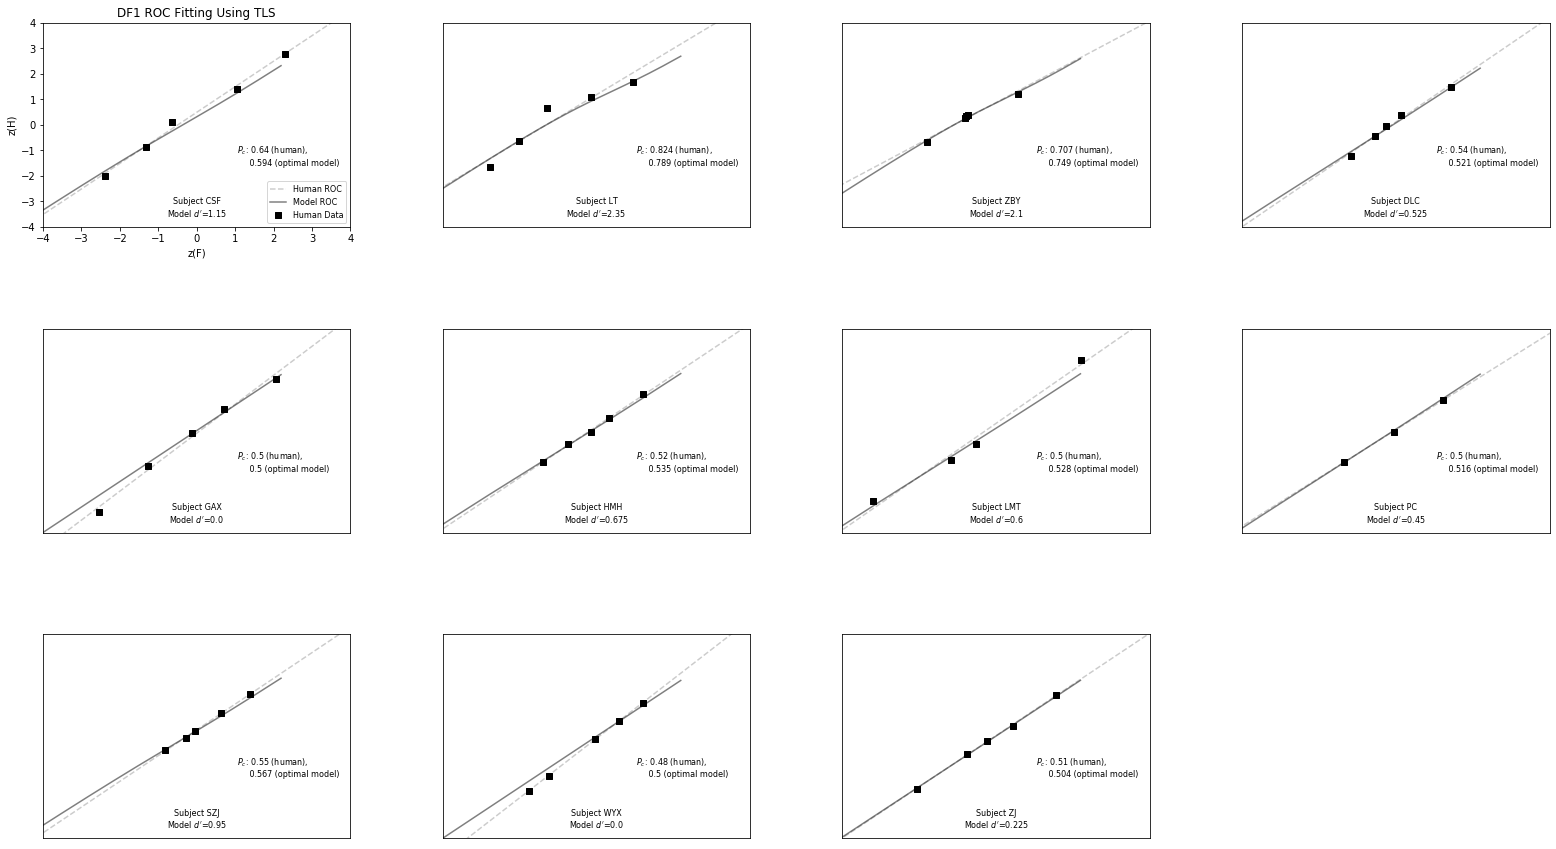

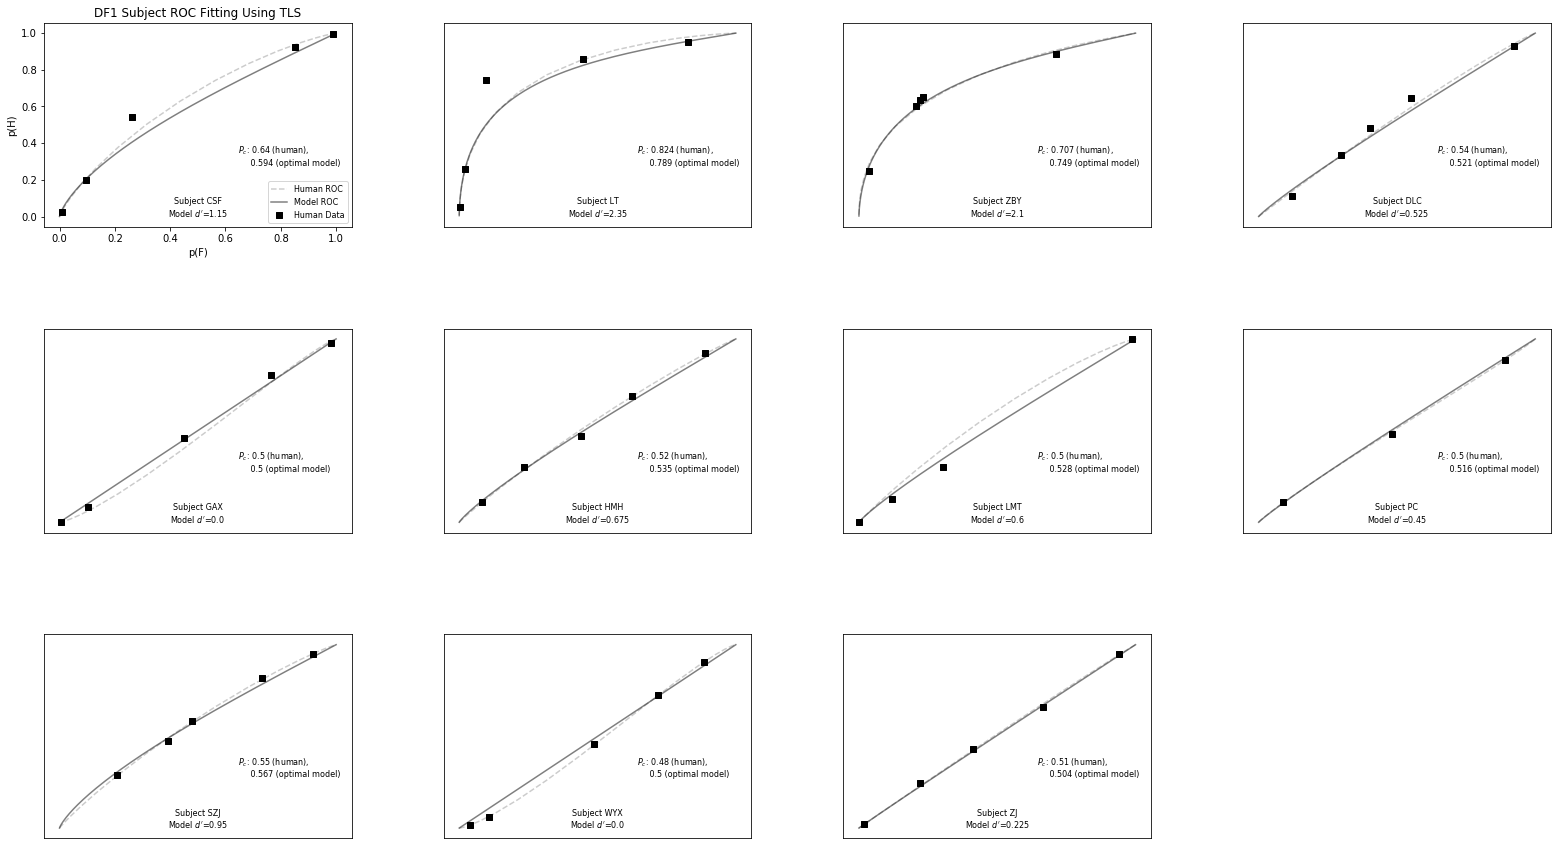

In [52]:
k_range = {'k_min': -4, 'k_max': 6, 'k_num': 401}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 101}

z_data = pd.read_csv('data/z_data.csv', index_col=0)
x_vals = [-5, 5]
explained_subs = ['CSF','LT','ZBY','DLC','HMH','GAX','LMT','PC','SZJ','WYX','ZJ']

count = 1
is_first = True
rows, cols = 3, 4

fig_z = plt.figure(figsize=(27, 15))
fig_z.subplots_adjust(hspace=0.5, wspace=0.3)
fig_p = plt.figure(figsize=(27, 15))
fig_p.subplots_adjust(hspace=0.5, wspace=0.3)

df = pd.DataFrame(columns=['Subject', 'DF1 d\''])

for i in range(len(z_data)):
    
    z_sub_data = z_data.iloc[i]
    subject = z_sub_data['Subject'].replace('\'', "")

    if subject in explained_subs:    

        # Unpack subject data
        zf_vals = [n for n in z_sub_data.filter(like='ZF').tolist() if n != 0]
        zh_vals = [n for n in z_sub_data.filter(like='ZH').tolist() if n != 0]
        pf_vals = [st.norm.cdf(z) for z in zf_vals]
        ph_vals = [st.norm.cdf(z) for z in zh_vals]

        # Find subject TLS regression line
        odr_data = odrpack.RealData(zf_vals, zh_vals)
        odr = odrpack.ODR(odr_data, linear, beta0=[1., 1.])
        subject_slope, subject_intercept = odr.run().beta
        print(f'{subject} TLS slope: {subject_slope}')
        
        coef = [subject_slope, subject_intercept]
        
        # Find d' that yields closest fitting z-ROC
        lowest_tls = np.inf
        best_dp = 0
        for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
            zfm_vals, zhm_vals = df_model.get_k_values_to_z(k_range, dp)
            zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
            zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
            zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new
            
            if len(zfm_vals) < 2:
                continue
            
            tls = np.mean([distance([f, h], coef) for f, h in zip(zfm_vals, zhm_vals)])

            if tls < lowest_tls:
                lowest_tls = tls
                best_dp = dp

        # Calculate R^2
        p1 = (-5, subject_intercept + subject_slope * -5)
        p2 = (5, subject_intercept + subject_slope * 5)
        zfm_vals, zhm_vals = df_model.get_k_values_to_z(k_range, best_dp)
        zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
        zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
        zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new
        ssr = np.sum([(mx - p4(p1, p2, (mx, my))[0])**2 + (my - p4(p1, p2, (mx, my))[1])**2 for mx, my in zip(zfm_vals, zhm_vals)])
        sst = np.sum([(mx - np.mean(zfm_vals))**2 + (my - np.mean(zhm_vals))**2 for mx, my in zip(zfm_vals, zhm_vals)])
        r_squared = round(1 - ssr/sst, 3)
        
        print(f"TLS value: {lowest_tls}\tR^2: {r_squared}")
        
        ax = fig_z.add_subplot(rows, cols, count)
        
        # Plot z-ROC
        y_pred = [subject_intercept + subject_slope * n for n in x_vals]
        ax.scatter(zf_vals, zh_vals, color='black', label='Human Data', marker='s')
        zfm_vals, zhm_vals = df_model.get_k_values_to_z(k_range, best_dp)
        #ax.plot(x_vals, y_pred, color='black', linestyle='--', alpha=0.2, label=f'Human ROC: y={round(subject_intercept, 3)}+{round(subject_slope, 3)}x')
        ax.plot(x_vals, y_pred, color='black', linestyle='--', alpha=0.2, label=f'Human ROC')
        ax.plot(zfm_vals, zhm_vals, color='black', alpha=0.5, label='Model ROC')

        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)
        subject_acc = round(z_sub_data['Accuracy'], 3)
        model_acc = round((st.norm.cdf(best_dp/2))**2 + (st.norm.cdf(-best_dp/2))**2, 3)
        ax.text(0.5, 0.05, f"Subject {subject}\n" + "Model $\it{d\'}$=" + f"{round(best_dp, 3)}", transform=ax.transAxes, ha='center', fontsize=8)
        ax.text(0.63, 0.3, "$\it{P}$$_c$: " + f"{subject_acc} (human),\n     {model_acc} (optimal model)", transform=ax.transAxes, ha='left', fontsize=8)
        
        if is_first:
            ax.set_xlabel('z(F)')
            ax.set_ylabel('z(H)')
            ax.set_title(f'DF1 ROC Fitting Using TLS')
            ax.legend(loc=4, prop={'size': 8})
        else:
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            
        fig_z.savefig('results/DF1_z.pdf')
        
        # Plot p-ROC
        ax = fig_p.add_subplot(rows, cols, count)
        ax.scatter(pf_vals, ph_vals, color='black', label='Human Data', marker='s')
        temp_x = np.linspace(-4, 4, 26)
        y_pred = [subject_intercept + subject_slope * n for n in temp_x]
        temp_x = [st.norm.cdf(val) for val in temp_x]
        y_pred = [st.norm.cdf(val) for val in y_pred]
        ax.plot(temp_x, y_pred, color='black', linestyle='--', alpha=0.2, label='Human ROC')
        pfm_vals, phm_vals = df_model.get_k_values_to_p(k_range, best_dp)
        ax.plot(pfm_vals, phm_vals, color='black', alpha=0.5, label='Model ROC')
        ax.text(0.5, 0.05, f"Subject {subject}\n" + "Model $\it{d\'}$=" + f"{round(best_dp, 3)}", transform=ax.transAxes, ha='center', fontsize=8)
        ax.text(0.63, 0.3, "$\it{P}$$_c$: " + f"{subject_acc} (human),\n     {model_acc} (optimal model)", transform=ax.transAxes, ha='left', fontsize=8)
        
        if is_first:
            ax.set_xlabel('p(F)')
            ax.set_ylabel('p(H)')
            ax.set_title(f'DF1 Subject ROC Fitting Using TLS')
            ax.legend(loc=4, prop={'size': 8})
            is_first=False
        else:
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            
        ax.set_xlim((-0.05580765917234185, 1.0557949748623252))
        ax.set_ylim((-0.05580765917234185, 1.0557949748623252))
    
        fig_p.savefig('results/DF1_p.pdf')

        df.loc[len(df)] = [subject, best_dp]
        count += 1
        
df.to_csv('results/df1.csv')

# Testing DF1 ROC above DF2

In [120]:
k_range = {'k_num': 1001}
dp_range = {'dp_min': 0.1, 'dp_max': 2.5, 'dp_num': 25}

num_points = 2000
all_possible_misses = dict()
for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    k_range['k_min'] = dp
    k_range['k_max'] = dp+1.5
    
    df2_f_vals, df2_h_vals = df_model.sample_k1_k2_values_to_p(k_range, dp, num_points)

    counter = 0
    oob_counter = 0
    real_counter = 0
    possible_misses = []
    for df2_f, df2_h in zip(df2_f_vals, df2_h_vals):
        df1_k = -st.norm.ppf(df2_f/2, scale=math.sqrt(2))
        
        if df1_k > 0:
            real_counter += 1
            assert(round(df_model.convert_k_to_p(dp, df1_k, df1_k)[0], 8) == round(df2_f, 8))
            if round(df_model.convert_k_to_p(dp, df1_k, df1_k)[1], 8) < round(df2_h, 8):
                counter += 1
            if df_model.convert_k_to_p(dp, df1_k, df1_k)[1] < df2_h:
                possible_misses.append(df_model.convert_k_to_p(dp, df1_k, df1_k)[1] - df2_h)
                
            if df1_k < k_range['k_min'] or df1_k > k_range['k_max']:
                oob_counter += 1

    print(f"d\'={round(dp, 2)}: {counter} points out of {real_counter} detected. {oob_counter} out of bounds.")
    all_possible_misses[dp] = possible_misses
        

d'=0.1: 0 points out of 2000 detected. 0 out of bounds.
d'=0.2: 0 points out of 2000 detected. 0 out of bounds.
d'=0.3: 0 points out of 2000 detected. 0 out of bounds.
d'=0.4: 0 points out of 2000 detected. 0 out of bounds.
d'=0.5: 0 points out of 2000 detected. 0 out of bounds.
d'=0.6: 0 points out of 2000 detected. 0 out of bounds.
d'=0.7: 0 points out of 2000 detected. 0 out of bounds.
d'=0.8: 0 points out of 2000 detected. 0 out of bounds.
d'=0.9: 0 points out of 2000 detected. 0 out of bounds.
d'=1.0: 0 points out of 2000 detected. 0 out of bounds.
d'=1.1: 0 points out of 2000 detected. 0 out of bounds.
d'=1.2: 0 points out of 2000 detected. 0 out of bounds.
d'=1.3: 0 points out of 2000 detected. 0 out of bounds.
d'=1.4: 0 points out of 2000 detected. 0 out of bounds.
d'=1.5: 0 points out of 2000 detected. 0 out of bounds.
d'=1.6: 0 points out of 2000 detected. 0 out of bounds.
d'=1.7: 0 points out of 2000 detected. 0 out of bounds.
d'=1.8: 0 points out of 2000 detected. 0 out of 

In [77]:
all_possible_misses

{0.1: [],
 0.2: [],
 0.3: [-1.1102230246251565e-16],
 0.4: [],
 0.5: [],
 0.6: [],
 0.7: [],
 0.7999999999999999: [-2.220446049250313e-16],
 0.8999999999999999: [],
 0.9999999999999999: [],
 1.0999999999999999: [-1.1102230246251565e-16],
 1.2: [-1.1102230246251565e-16, -1.1102230246251565e-16],
 1.3: [],
 1.4: [],
 1.5: [],
 1.5999999999999999: [-1.1102230246251565e-16],
 1.7: [-1.1102230246251565e-16],
 1.8: [],
 1.9: [],
 2.0: [],
 2.0999999999999996: [-2.220446049250313e-16, -1.1102230246251565e-16],
 2.1999999999999997: [],
 2.3: [-1.1102230246251565e-16],
 2.4: [-1.1102230246251565e-16],
 2.5: []}